## The goal of this notebook is to see how effectively Facebook Prophet can forecast gun violence trends one year into the future.

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [2]:
guns = pd.read_csv('../data/guns2.csv', index_col=0)

In [3]:
guns.head()

,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,0.0,14.0,NaN,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,0.0,43.0,NaN,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,0.0,9.0,0::Unknown||1::Unknown,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,0.0,6.0,NaN,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,0.0,6.0,0::Unknown||1::Unknown,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [4]:
guns.tail()

,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,Illinois,Dekalb,1300 block of N Annie Glidden Rd,1,0,http://www.gunviolencearchive.org/incident/108...,https://chicago.suntimes.com/news/woman-wounde...,0.0,NaN,0::Unknown,...,0::26,0::Adult 18+,0::Female,NaN,NaN,0::Killed,0::Victim,https://chicago.suntimes.com/news/woman-wounde...,NaN,NaN
2018-03-31,South Carolina,Loris,Everette Rose Ln,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.myrtlebeachonline.com/news/local/cr...,0.0,7.0,0::Unknown,...,0::58,0::Adult 18+,0::Male,NaN,NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.myrtlebeachonline.com/news/local/cr...,55.0,28.0
2018-03-31,Michigan,Lansing,S Martin Luther King Jr Blvd and Mary Ave,0,1,http://www.gunviolencearchive.org/incident/108...,https://www.lansingstatejournal.com/story/news...,0.0,NaN,0::Unknown,...,0::25,0::Adult 18+,0::Male,0::Michael Magik Jones,NaN,"0::Injured, Arrested",0::Subject-Suspect,https://www.lansingstatejournal.com/story/news...,NaN,NaN
2018-03-31,Massachusetts,Lynn,498 Essex St,0,0,http://www.gunviolencearchive.org/incident/108...,https://www.itemlive.com/2018/04/01/police-log...,0.0,6.0,0::Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.itemlive.com/2018/04/01/police-log...,92.0,22.0
2018-03-31,Wisconsin,Madison,500 block of Northport Dr,0,0,http://www.gunviolencearchive.org/incident/108...,https://www.channel3000.com/news/family-finds-...,0.0,2.0,0::Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.channel3000.com/news/family-finds-...,48.0,16.0


## Making a dataframe only of n_killed from the year 2014 on:

In [5]:
df = guns[['n_killed']]
df = df.loc['2014-01-01':'2018-03-31']
df.reset_index(inplace=True)

## Formatting my data into a dataframe that FB Prophet can understand:

In [6]:
df = pd.DataFrame(df.groupby("date").n_killed.sum())
df.reset_index(inplace=True)
df.rename(columns={"date": "ds", "n_killed": 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2014-01-01,50
1,2014-01-02,29
2,2014-01-03,37
3,2014-01-04,37
4,2014-01-05,31


In [7]:
np.mean(df.y)

38.895348837209305

### Sidenote: I see that, on average, there are about 39 gun murders on any given day in America.

## Instantiating and fitting my FB Prophet model:

In [8]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/cricket/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
future = m.make_future_dataframe(periods=365, freq='D')
future.tail()

,ds
1908,2019-03-27
1909,2019-03-28
1910,2019-03-29
1911,2019-03-30
1912,2019-03-31


In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1908,2019-03-27,35.220198,24.852234,45.375514
1909,2019-03-28,33.600540,23.494033,43.401394
1910,2019-03-29,36.440947,25.740005,45.871227
1911,2019-03-30,42.639294,32.938317,52.343940
1912,2019-03-31,44.655033,35.141473,55.168591


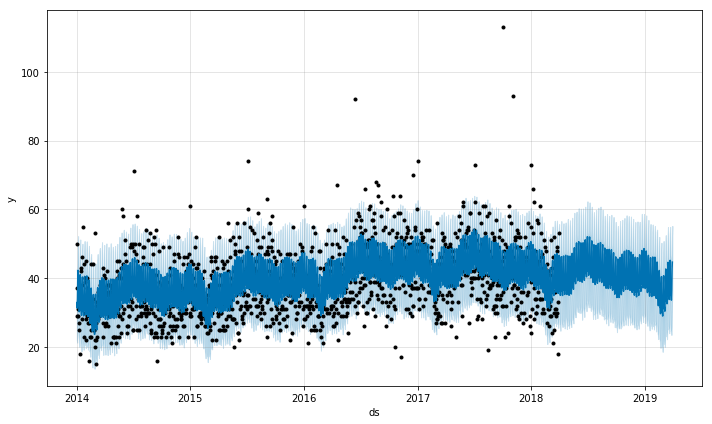

In [11]:
fig1 = m.plot(forecast)

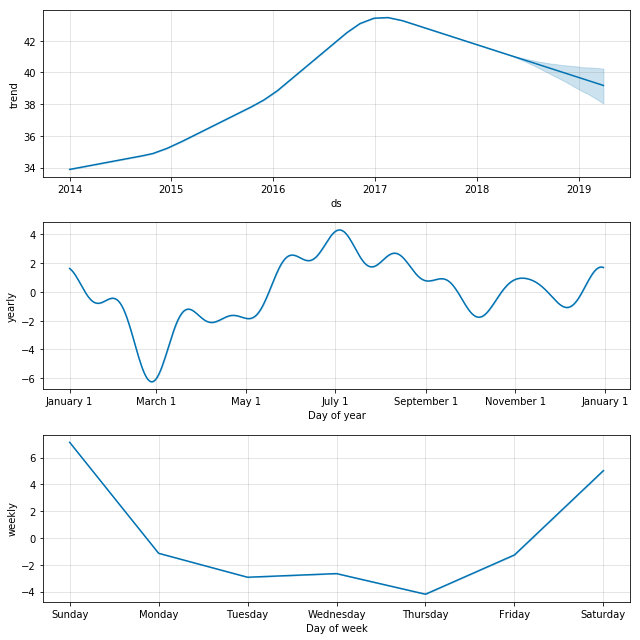

In [12]:
fig2 = m.plot_components(forecast)

## Running some diagnostics to see how Prophet performs on historical data

In [13]:
df_cv = cross_validation(m, horizon='365 days')
df_cv.tail()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-03-31 00:00:00 and 2017-03-31 00:00:00
/Users/cricket/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
360,2018-03-27,46.710753,36.967393,56.514943,18,2017-03-31
361,2018-03-28,47.155254,37.521878,57.091984,42,2017-03-31
362,2018-03-29,44.903712,35.832751,53.818715,33,2017-03-31
363,2018-03-30,47.984975,39.327070,57.307300,41,2017-03-31
364,2018-03-31,54.154107,45.304097,63.359157,53,2017-03-31


In [14]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
35,36 days,40.738118,6.382642,4.807525,0.137632,0.833333
36,37 days,40.813691,6.388559,4.827064,0.138020,0.833333
37,38 days,39.910732,6.317494,4.713649,0.135442,0.833333
38,39 days,39.509523,6.285660,4.649735,0.134137,0.833333
39,40 days,41.408894,6.434974,4.818934,0.139548,0.805556


In [15]:
df_p.tail()

,horizon,mse,rmse,mae,mape,coverage
360,361 days,201.822531,14.206426,12.439157,0.418465,0.444444
361,362 days,202.349477,14.224960,12.505748,0.420134,0.444444
362,363 days,200.383277,14.155680,12.431497,0.415157,0.444444
363,364 days,200.968689,14.176343,12.479287,0.415588,0.444444
364,365 days,200.215646,14.149758,12.363206,0.412189,0.444444


### It's clear that the predictions get less and less accurate the further into the future you're forecasting. RMSE begins at about 6, but deteriorates to around 14 at the end of the forecast period (in this case, one year). That might not seem like a lot, but remember that gun murders are about 39 per day. In light of this, a prediction that is 14 deaths off is not very accurate.

### That being said, Prophet captures the seasonal trends of gun violence very well. In terms of making shorter-term predictions, it could prove to be a very valuable tool.

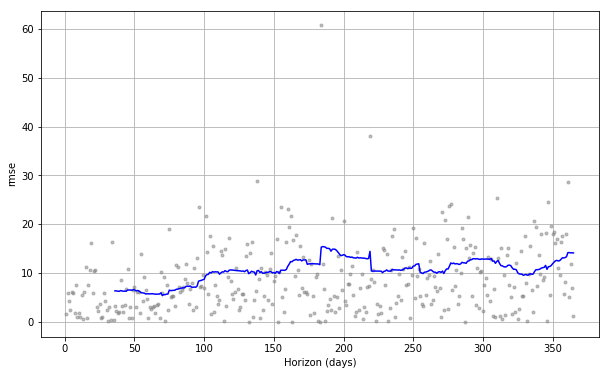

In [16]:
fig = plot_cross_validation_metric(df_cv, metric = 'rmse')